## Método del trapecio

Es un método de integración numérica para calcular aproximadamente el valor de la integral definida $$\int_{a}^b f(x)d(x).$$
Se basa en aproximar el valor de la integral de $f(x)$ por el de la función lineal que pasa a través de los puntos
$(a, f(a))$ y $(b, f(b))$. La integral de ésta es igual al área del trapecio bajo la gráfica de la función lineal. Se sigue que $$\int_{a}^b f(x)d(x) \approx (b-a) \frac {f(a)+f(b)}{2}.$$
Y el error es: $$- \frac {(b-a)^3}{12} f^{(2)}(\xi)$$
Siendo $ \xi$ un numero entre $a$ y $b$

### Método de los trapecios (Método del trapecio compuesto)
El método de los trapecios es una extensión de lo anterior, una forma de aproximar una integral definida utilizando $n$ trapecios. En la formulación de este método se supone que $f(x)$ es continua y positiva en el intervalo $[a,b]$.

Inicialmente tendriamos que el intervalo $[a,b]$ se divide en n subintervalos, cada uno de la misma longitud de ancho $\Delta x = \frac {(b - a)}{n}.$

Y finalmente queda dada por la siguiente fórmula:
$$\int_{a}^b f(x)d(x) \approx \frac {h}{2} [f(a) + 2 \sum_{K=1}^{n-1}f(x_k)+f(b)].$$
donde $h= \Delta x = \frac {(b - a)}{n}$ y $x_k= a+ kh$

Y el error estimado viene dado por $$E_x=-\frac{b-a}{12}h^2 f^{(2)}(\xi)$$

Donde $\xi$ es un punto en el intervalo, es decir, $\Delta x$

#### Ejemplo 
Usando una funcion definida como $f(x)=x^3−6*x^2+11*x−6$ realizamos la aproximación en el intervalo (1:2) usando un numero seis subintervalos(trapecios)

In [98]:
function Met_Trapecios(n::Int, lim_a, lim_b)
    f(x)=x^3−6*x^2+11*x−6
    aprox_trap=0
    h = (lim_b-lim_a)/n
    for k in 1:n-1
        println(aprox_trap += f(lim_a + k*h))
    end
    return h/2 * (f(lim_a) + 2*aprox_trap + f(lim_b))
end   

Met_Trapecios (generic function with 2 methods)

In [99]:
num_intervalos=6
lim_inferior=1
lim_superior=2
Met_Trapecios(num_intervalos,lim_inferior,lim_superior)

h = (lim_b - lim_a) / n = 0.16666666666666666
0.25462962962962976
0.625
1.0
1.2962962962962958
1.4583333333333321


0.24305555555555536

Evaluando la integral de la función de forma directa el resultado sería $$\int_{1}^2 (x^3−6*x^2+11*x−6) d(x)=0.25$$

Calculamos el error:

In [100]:
function error_metodo(n,lim_a,lim_b)
    var_e=(lim_b-lim_a)/12
    h = (lim_b-lim_a)/n
    f2(x)=6*x-12
    return -var_e*h^2*f2(h)
end    

error_metodo (generic function with 1 method)

In [103]:
error_metodo(6,1,2)

0.02546296296296296

In [ ]:

function tabla(n,error)
    datos_error=[]
    for i 1=n
        push!=(dator_error,error)

In [105]:
] add CairoMakie

    Updating registry at `C:\Users\dan_x\.julia\registries\General.toml`
   Resolving package versions...
   Installed Pango_jll ── v1.50.9+0
   Installed CairoMakie ─ v0.8.13
   Installed Cairo ────── v1.0.5
    Updating `C:\Users\dan_x\.julia\environments\v1.7\Project.toml`
  [13f3f980] + CairoMakie v0.8.13
    Updating `C:\Users\dan_x\.julia\environments\v1.7\Manifest.toml`
  [159f3aea] + Cairo v1.0.5
  [13f3f980] + CairoMakie v0.8.13
  [36c8627f] + Pango_jll v1.50.9+0
Precompiling project...
  ✓ Pango_jll
  ✓ Cairo
  ✓ CairoMakie
  3 dependencies successfully precompiled in 85 seconds (341 already precompiled, 1 skipped during auto due to previous errors)


In [111]:
using CairoMakie

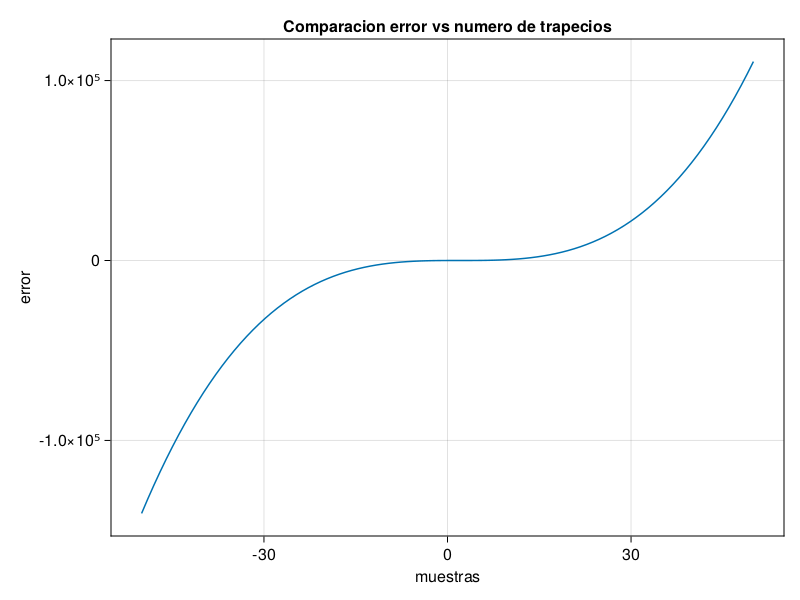

In [134]:
fig = Figure()
ax = Axis(fig[1, 1],title = "Comparacion error vs numero de trapecios",xlabel="muestras", ylabel="error")
x = range(-50, 50, length=100)
y = x.^3 .− 6 .* x.^2 .+ 11 .*x .− 6

lines!(ax,x,y)
fig

In [135]:
x

-50.0:1.0101010101010102:50.0

In [136]:
y

100-element Vector{Float64}:
 -140556.0
 -132521.20752881328
 -124798.5662605032
 -117381.89253415701
 -110265.00268886189
 -103441.71306370507
  -96905.83999777386
  -90651.19983015543
  -84671.60889993701
  -78960.88354620585
  -73512.84010804915
  -68321.29492455418
  -63380.06433480812
       ⋮
   50161.14677640603
   54397.68736853278
   58866.23891810668
   63572.98508604048
   68524.10953324694
   73725.79592063888
   79184.22790912903
   84905.58915963018
   90896.06333305508
   97161.8340903165
  103709.08509232721
  110544.0